### Goal is to make some examples like this that show users how to:
* query the database
* search and find datasets they want to use
* then use them
all in the same code.

In [1]:
import intake
import matplotlib.pyplot as plt

### Open the catalog

In [2]:
url='https://raw.githubusercontent.com/kpegion/COLA-DATASETS-CATALOG/gh-pages/intake-catalogs/'
yaml='master.yaml'
cat = intake.open_catalog(url+yaml)

In [11]:
for name in cat.walk():
    #print(cat[name])
    print(cat.walk())

{'obs.Gridded': name: Gridded
container: catalog
plugin: ['yaml_file_cat']
description: COLA Observational Dataset Catalog
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: {{CATALOG_DIR}}/gridded.yaml, 'obs': name: obs
container: catalog
plugin: ['yaml_file_cat']
description: COLA Observational Dataset Catalog
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: {{CATALOG_DIR}}/obs.yaml, 'reanalysis.example': name: example
container: None
plugin: []
description: 
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: , 'reanalysis': name: reanalysis
container: catalog
plugin: ['yaml_file_cat']
description: COLA Reanalysis Dataset Catalog
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: {{CATALOG_DIR}}/reanalysis.yaml, 'analysis.example': name: example
container: None
plugin: []
description: 
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: , 'analysis': name: analysis
container: catalog
plugin: ['yaml_

### The walk method makes it possible to view the catalog entries at however many levels are desired based on depth

This is listing everything to some depth so it can get long 
Also, its not clear how I would know how deep it goes

In [3]:
for i in range(5):
    print("Depth: ",str(i),cat.walk(depth=i))

Depth:  0 {'obs': name: obs
container: catalog
plugin: ['yaml_file_cat']
description: COLA Observational Dataset Catalog
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: {{CATALOG_DIR}}/obs.yaml, 'reanalysis': name: reanalysis
container: catalog
plugin: ['yaml_file_cat']
description: COLA Reanalysis Dataset Catalog
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: {{CATALOG_DIR}}/reanalysis.yaml, 'analysis': name: analysis
container: catalog
plugin: ['yaml_file_cat']
description: COLA Analysis Dataset Catalog
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: {{CATALOG_DIR}}/analysis.yaml, 'model': name: model
container: catalog
plugin: ['yaml_file_cat']
description: COLA Model Simulations and Experiments Dataset Catalog
direct_access: forbid
user_parameters: []
metadata: 
args: 
  path: {{CATALOG_DIR}}/model.yaml}
Depth:  1 {'obs': name: obs
container: catalog
plugin: ['yaml_file_cat']
description: COLA Observational Dataset Catalo

### There seems to also be a search function

#### List all precip datasets at different depths;
again, I have to specify a depth, but would be good to be able to determine this in my program

In [96]:
for i in range(6):
    print(list(cat.search('precip', depth=i)))

[]
[]
[]
[]
['obs.Gridded.atm.Precip']
['obs.Gridded.atm.OLR.cpc-precip-conus_monthly', 'obs.Gridded.atm.Precip.cpc-precip', 'obs.Gridded.atm.Precip.cpc-precip-conus_daily', 'obs.Gridded.atm.Precip.cpc-precip-conus_monthly', 'obs.Gridded.atm.Precip.gpcc', 'obs.Gridded.atm.Precip.gpcp', 'obs.Gridded.atm.Precip.cmap_monthly', 'obs.Gridded.atm.Precip.cmap_pentad', 'obs.Gridded.atm.Precip']


#### List all Gridded datasets at depth=5

In [97]:
list(cat.search('Gridded', depth=5))

['obs.Gridded.ocn.sst.oisstv2_monthly',
 'obs.Gridded.ocn.sst.oisstv2_weekly',
 'obs.Gridded.ocn.sst.ersstv3b',
 'obs.Gridded.ocn.sst.ersstv4',
 'obs.Gridded.ocn.sst.ersstv5',
 'obs.Gridded.ocn.sst.cobe-sst2',
 'obs.Gridded.atm.OLR.noaa_interp_olr_daily',
 'obs.Gridded.atm.OLR.cpc-precip-conus_monthly',
 'obs.Gridded.atm.Precip.cpc-precip',
 'obs.Gridded.atm.Precip.cpc-precip-conus_daily',
 'obs.Gridded.atm.Precip.cpc-precip-conus_monthly',
 'obs.Gridded.atm.Precip.gpcc',
 'obs.Gridded.atm.Precip.gpcp',
 'obs.Gridded.atm.Precip.cmap_monthly',
 'obs.Gridded.atm.Precip.cmap_pentad',
 'obs.Gridded.atm.Air-Temperature.ghcn_cams',
 'obs.Gridded']

In [98]:
list(cat.search('monthly', depth=5))

['obs.Gridded.ocn.sst.oisstv2_monthly',
 'obs.Gridded.fluxes.sh_monthly',
 'obs.Gridded.fluxes.lh_monthly',
 'obs.Gridded.atm.OLR.cpc-precip-conus_monthly',
 'obs.Gridded.atm.Precip.cpc-precip-conus_monthly',
 'obs.Gridded.atm.Precip.gpcc',
 'obs.Gridded.atm.Precip.gpcp',
 'obs.Gridded.atm.Precip.cmap_monthly',
 'obs.Gridded.atm.Air-Temperature.ghcn_cams']

#### List all monthly and SST data

In [99]:
cat2=(cat.search('monthly',depth=10).search('sst'))
list(cat2)

['obs.Gridded.ocn.sst.oisstv2_monthly']

In [100]:
ds=cat.obs.Gridded.ocn.sst.oisstv2_monthly.to_dask()
ds

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 461)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2020-04-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

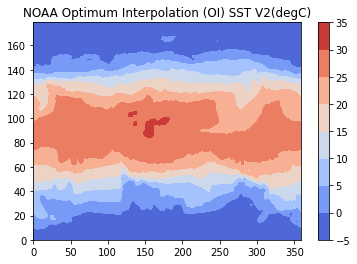

In [101]:
plt.contourf(ds['sst'][0,:,:],cmap='coolwarm')
plt.title(ds.attrs['dataset_title']+'('+ds['sst'].attrs['units']+')')
plt.colorbar()

### Or Something like this ...

NOAA Optimum Interpolation (OI) SST V2


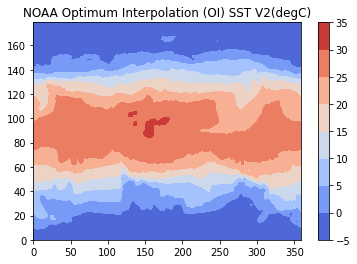

In [102]:
for d in (cat2):
   
    ds=cat[d].to_dask()
    print(ds.attrs['dataset_title'])
    
    plt.contourf(ds['sst'][0,:,:],cmap='coolwarm')
    plt.title(ds.attrs['dataset_title']+'('+ds['sst'].attrs['units']+')')
    plt.colorbar()